In [359]:
import tensorflow as tf
from keras import layers, utils
import keras
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from numpy.random import seed
import numpy as np

In [378]:
train1 = tf.keras.utils.image_dataset_from_directory('c:/Users/RyanM/OneDrive/Desktop/KaggleProject/train').prefetch(tf.data.AUTOTUNE).cache()
validation1 = tf.keras.utils.image_dataset_from_directory('c:/Users/RyanM/OneDrive/Desktop/KaggleProject/valid').prefetch(tf.data.AUTOTUNE).cache()
class_names = train_data.class_names
batch = train_data.as_numpy_iterator().next()
batch[0].shape

Found 13492 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


(32, 256, 256, 3)

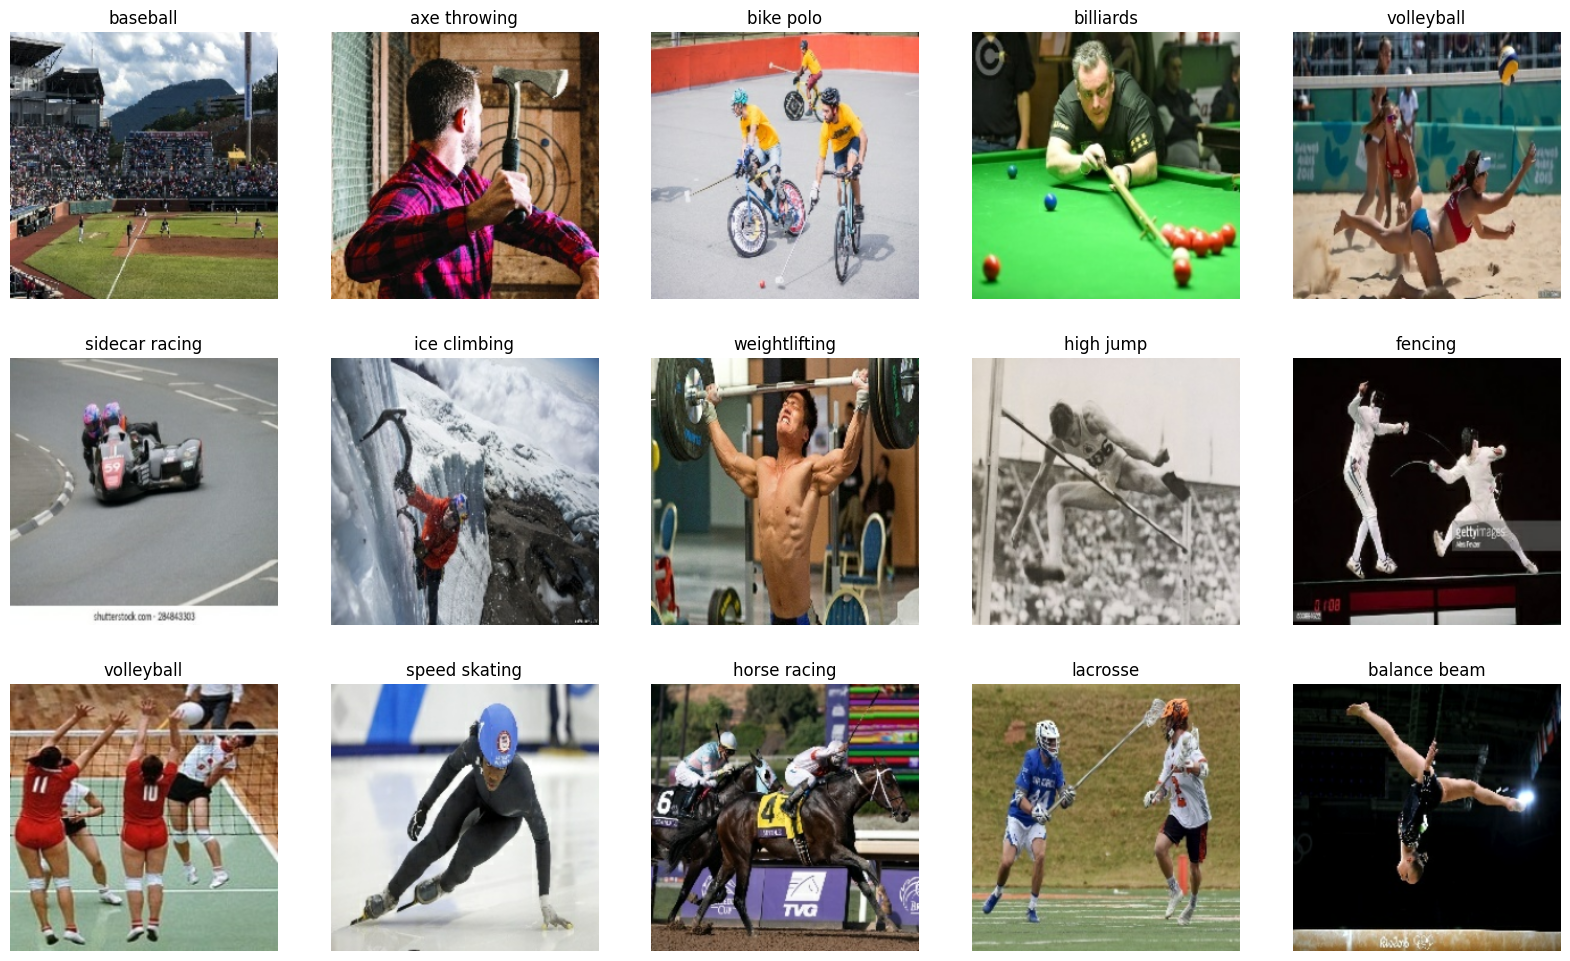

In [379]:
plt.figure(figsize=(20,12))
for x in train1.take(1):
    for i in range(15):
        plt.subplot(3,5,i+1)
        image = x[0][i] / 255.
        plt.imshow(image)
        plt.title(class_names[x[1][i]])
        plt.axis('off')

In [381]:
scaled_data = train1.map(lambda x,y:(x/255,y)) 
scaled_val_data = validation1.map(lambda x,y: (x/255, y))

In [382]:
data_augmentation = keras.Sequential([
    keras.layers.Resizing(height=224, width=224),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomFlip("horizontal",),
    keras.layers.RandomZoom(0.1),
])

In [384]:
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.metrics import Precision, Recall, BinaryAccuracy


model = Sequential()

model.add(Conv2D(filters=32, kernel_size = 3, strides=1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size = 3, strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=32, kernel_size = 3, strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(1000, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_96 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_96 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_97 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_97 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_98 (Conv2D)          (None, 60, 60, 32)        18464     
                                                                 
 max_pooling2d_98 (MaxPooli  (None, 30, 30, 32)      

In [386]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=["accuracy"]
              )

In [388]:
training_hist = model.fit(
    scaled_data,
    validation_data=scaled_val_data,
    epochs=10
)

Epoch 1/10
422/422 [==============================] - 410s 972ms/step - loss: 0.8647 - accuracy: 0.7782 - val_loss: 5.9825 - val_accuracy: 0.1660
Epoch 2/10
422/422 [==============================] - 403s 955ms/step - loss: 0.2956 - accuracy: 0.9299 - val_loss: 7.2328 - val_accuracy: 0.1920
Epoch 3/10
422/422 [==============================] - 1996s 5s/step - loss: 0.1498 - accuracy: 0.9638 - val_loss: 8.0988 - val_accuracy: 0.1940
Epoch 4/10
422/422 [==============================] - 438s 1s/step - loss: 0.1085 - accuracy: 0.9749 - val_loss: 8.1030 - val_accuracy: 0.1840
Epoch 5/10
422/422 [==============================] - 432s 1s/step - loss: 0.0783 - accuracy: 0.9792 - val_loss: 9.1201 - val_accuracy: 0.1660
Epoch 6/10
422/422 [==============================] - 431s 1s/step - loss: 0.0541 - accuracy: 0.9878 - val_loss: 9.9261 - val_accuracy: 0.1540
Epoch 7/10
422/422 [==============================] - 432s 1s/step - loss: 0.0804 - accuracy: 0.9814 - val_loss: 8.4934 - val_accuracy:

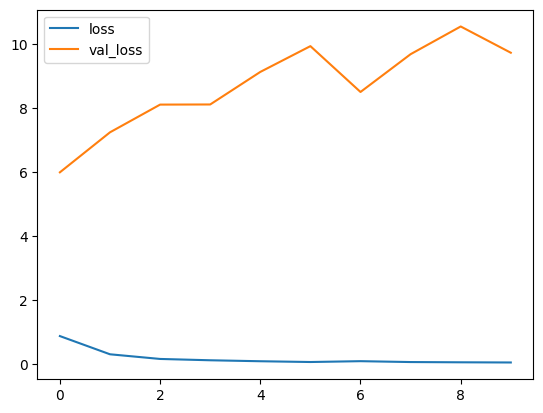

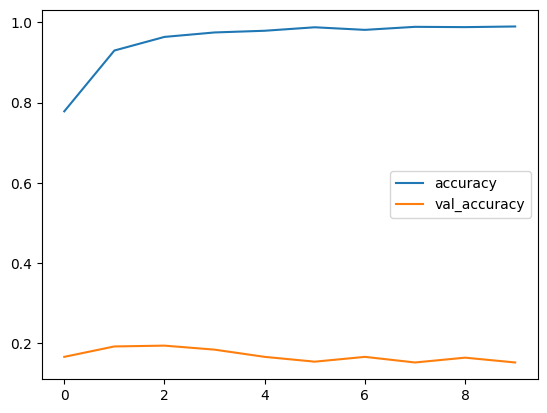

In [399]:
import pandas as pd

history_frame = pd.DataFrame(training_hist.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [389]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [402]:
from keras.layers import BatchNormalization

model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size = 3, strides=1, activation='relu', input_shape=(256,256,3)))
model2.add(MaxPooling2D())

model2.add(BatchNormalization(renorm=True))
model2.add(Conv2D(filters=64, kernel_size = 3, strides=1, activation='relu'))
model2.add(MaxPooling2D())

model2.add(Conv2D(filters=32, kernel_size = 3, strides=1, activation='relu'))
model2.add(MaxPooling2D())

model2.add(Flatten())

model2.add(Dense(500, activation='relu'))
model2.add(Dropout(0.4))
model.add(Dense(500, activation='sigmoid'))
model2.add(Dropout(0.4))
model2.add(Dense(100, activation='softmax'))

model2.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_103 (Conv2D)         (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_103 (MaxPool  (None, 127, 127, 32)      0         
 ing2D)                                                          
                                                                 
 batch_normalization_36 (Ba  (None, 127, 127, 32)      224       
 tchNormalization)                                               
                                                                 
 conv2d_104 (Conv2D)         (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_104 (MaxPool  (None, 62, 62, 64)        0         
 ing2D)                                                          
                                                     

In [403]:
training_hist2 = model2.fit(
    scaled_data,
    validation_data=scaled_val_data,
    epochs=10,
    callbacks=[es_callback]
)

Epoch 1/10


422/422 [==============================] - 490s 1s/step - loss: 4.3538 - accuracy: 0.0514 - val_loss: 4.0370 - val_accuracy: 0.0920
Epoch 2/10
422/422 [==============================] - 463s 1s/step - loss: 3.8601 - accuracy: 0.1225 - val_loss: 3.5458 - val_accuracy: 0.1880
Epoch 3/10
422/422 [==============================] - 466s 1s/step - loss: 3.2703 - accuracy: 0.2240 - val_loss: 3.6032 - val_accuracy: 0.1760
Epoch 4/10
422/422 [==============================] - 465s 1s/step - loss: 2.7350 - accuracy: 0.3390 - val_loss: 3.5748 - val_accuracy: 0.2040
Epoch 5/10
422/422 [==============================] - 466s 1s/step - loss: 2.1468 - accuracy: 0.4598 - val_loss: 3.4435 - val_accuracy: 0.2040
Epoch 6/10
422/422 [==============================] - 468s 1s/step - loss: 1.6317 - accuracy: 0.5804 - val_loss: 3.5308 - val_accuracy: 0.2260
Epoch 7/10
422/422 [==============================] - 475s 1s/step - loss: 1.3030 - accuracy: 0.6545 - val_loss: 3.5968 - val_accuracy: 0.2200
Epoch 8/10

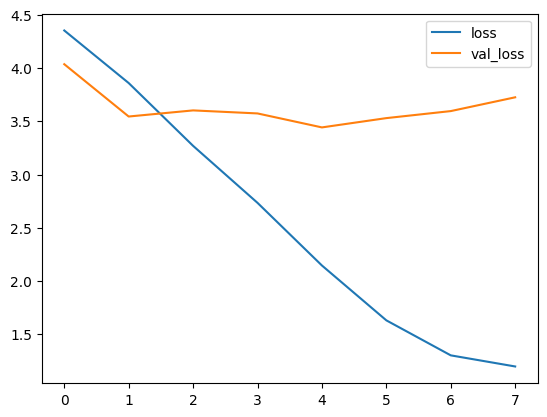

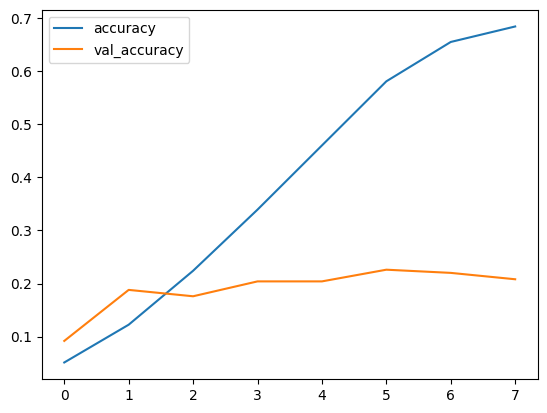

In [404]:
history_frame2 = pd.DataFrame(training_hist2.history)
history_frame2.loc[:, ['loss', 'val_loss']].plot()
history_frame2.loc[:, ['accuracy', 'val_accuracy']].plot()

In [419]:
train_small = tf.keras.utils.image_dataset_from_directory('c:/Users/RyanM/OneDrive/Desktop/KaggleProject/train_small')#.prefetch(tf.data.AUTOTUNE).cache()
validation_small = tf.keras.utils.image_dataset_from_directory('c:/Users/RyanM/OneDrive/Desktop/KaggleProject/valid_small').prefetch(tf.data.AUTOTUNE).cache()
test_small = tf.keras.utils.image_dataset_from_directory('c:/Users/RyanM/OneDrive/Desktop/KaggleProject/test_small').prefetch(tf.data.AUTOTUNE).cache()
class_names_small = train_small.class_names
batch = train_small.as_numpy_iterator().next()
batch[0].shape

Found 343 files belonging to 2 classes.


Found 10 files belonging to 2 classes.
Found 10 files belonging to 2 classes.


(32, 256, 256, 3)

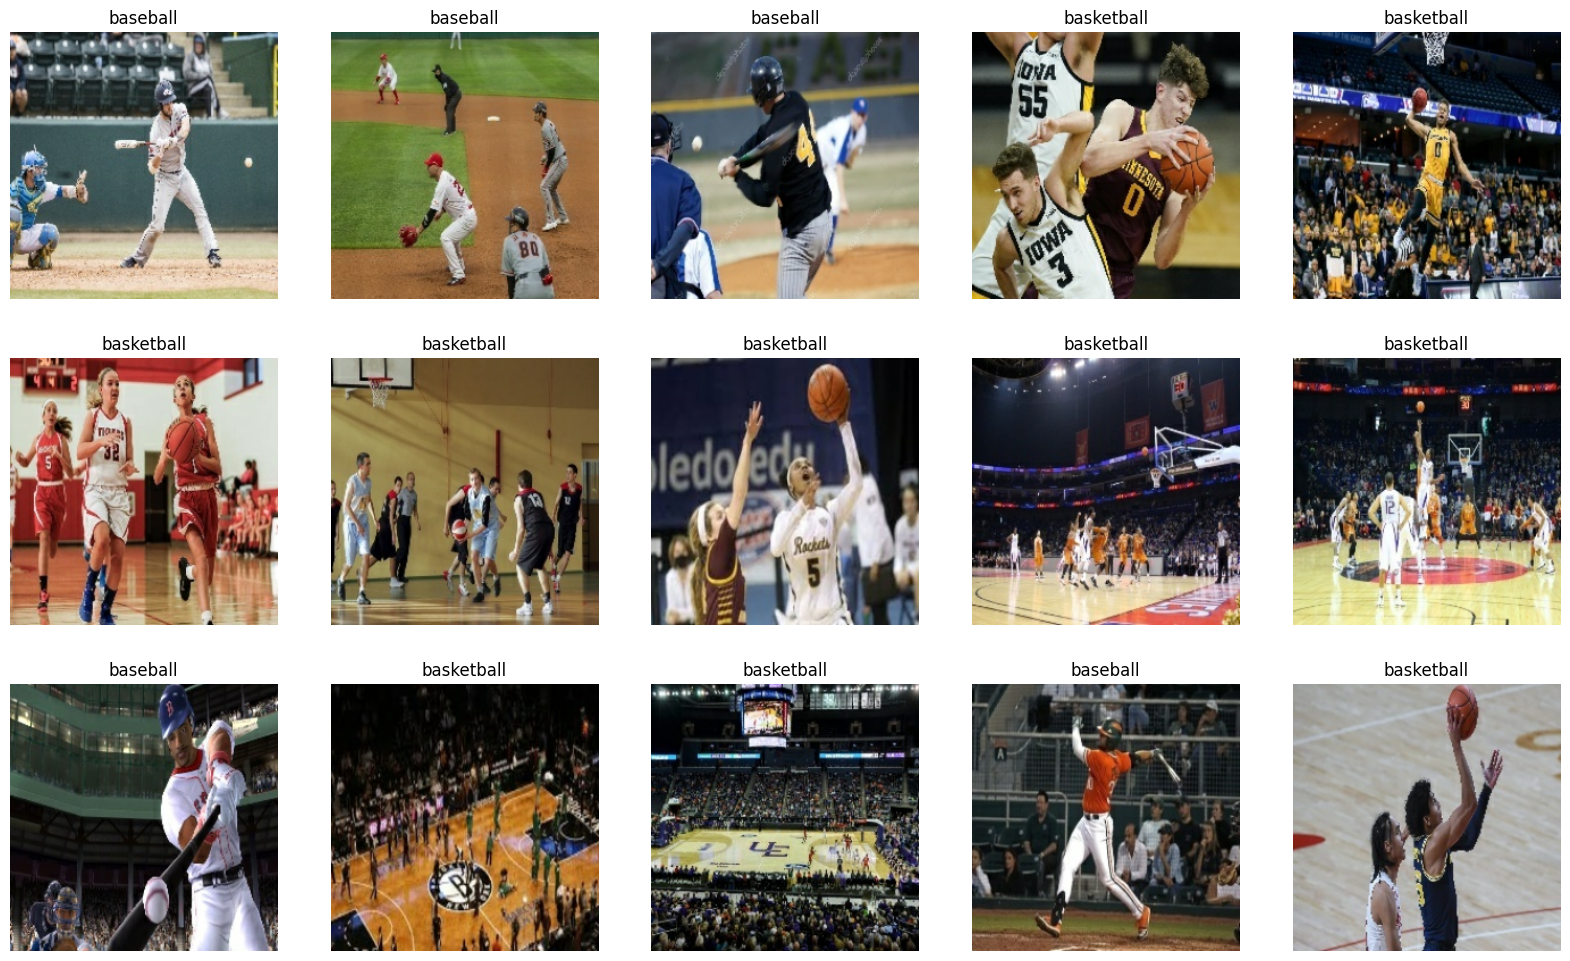

In [413]:
plt.figure(figsize=(20,12))
for x in train_small.take(1):
    for i in range(15):
        plt.subplot(3,5,i+1)
        image = x[0][i] / 255.
        plt.imshow(image)
        plt.title(class_names_small[x[1][i]])
        plt.axis('off')

In [420]:
scaled_data_small = train_small.map(lambda x,y:(x/255,y)) 
scaled_val_data_small = validation_small.map(lambda x,y: (x/255, y))
scaled_test_data_small = test_small.map(lambda x,y: (x/255, y))

In [416]:
from keras.layers import BatchNormalization

model3 = Sequential()

model3.add(Conv2D(filters=32, kernel_size = 3, strides=1, activation='relu', input_shape=(256,256,3)))
model3.add(MaxPooling2D())

model3.add(BatchNormalization(renorm=True))
model3.add(Conv2D(filters=64, kernel_size = 3, strides=1, activation='relu'))
model3.add(MaxPooling2D())

model3.add(Conv2D(filters=32, kernel_size = 3, strides=1, activation='relu'))
model3.add(MaxPooling2D())

model3.add(Flatten())

model3.add(Dense(20, activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(10, activation='sigmoid'))
model3.add(Dropout(0.4))
model3.add(Dense(2, activation='softmax'))

model3.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model3.summary()

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_112 (Conv2D)         (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_112 (MaxPool  (None, 127, 127, 32)      0         
 ing2D)                                                          
                                                                 
 batch_normalization_39 (Ba  (None, 127, 127, 32)      224       
 tchNormalization)                                               
                                                                 
 conv2d_113 (Conv2D)         (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_113 (MaxPool  (None, 62, 62, 64)        0         
 ing2D)                                                          
                                                     

In [417]:
training_hist3 = model3.fit(
    scaled_data_small,
    validation_data=scaled_val_data_small,
    epochs=10,
    callbacks=[es_callback]
)

Epoch 1/10
11/11 [==============================] - 12s 1s/step - loss: 0.7642 - accuracy: 0.4898 - val_loss: 0.6862 - val_accuracy: 0.8000
Epoch 2/10
11/11 [==============================] - 12s 1s/step - loss: 0.6944 - accuracy: 0.5569 - val_loss: 0.6307 - val_accuracy: 0.7000
Epoch 3/10
11/11 [==============================] - 12s 1s/step - loss: 0.6325 - accuracy: 0.6647 - val_loss: 0.5762 - val_accuracy: 0.7000
Epoch 4/10
11/11 [==============================] - 12s 1s/step - loss: 0.6197 - accuracy: 0.6560 - val_loss: 0.5940 - val_accuracy: 0.7000
Epoch 5/10
11/11 [==============================] - 12s 1s/step - loss: 0.5797 - accuracy: 0.7230 - val_loss: 0.5642 - val_accuracy: 0.6000
Epoch 6/10
11/11 [==============================] - 12s 1s/step - loss: 0.5683 - accuracy: 0.7376 - val_loss: 0.5772 - val_accuracy: 0.7000
Epoch 7/10
11/11 [==============================] - 12s 1s/step - loss: 0.5502 - accuracy: 0.7259 - val_loss: 0.4868 - val_accuracy: 0.8000
Epoch 8/10
11/11 [==

<Axes: >

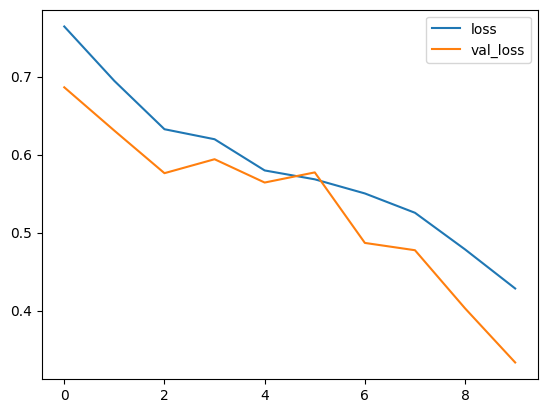

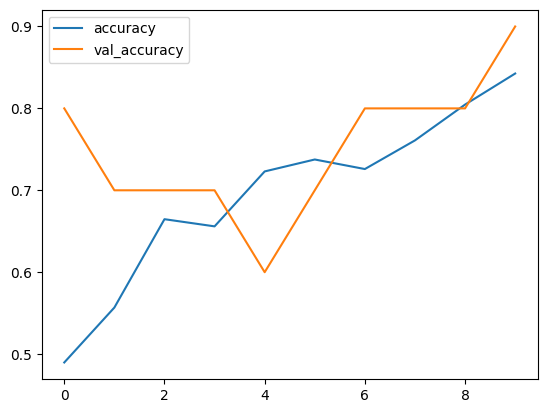

In [418]:
history_frame3 = pd.DataFrame(training_hist3.history)
history_frame3.loc[:, ['loss', 'val_loss']].plot()
history_frame3.loc[:, ['accuracy', 'val_accuracy']].plot()

In [423]:
predictions = model3.predict(scaled_test_data_small)
preds = np.argmax(predictions,axis=1)
preds

1/1 [==============================] - 0s 74ms/step


array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [424]:
model3.evaluate(scaled_test_data_small)

1/1 [==============================] - 0s 74ms/step - loss: 0.5287 - accuracy: 0.7000


[0.5287153720855713, 0.699999988079071]

In [438]:
model3.save('c:/Users/RyanM/OneDrive/Desktop/KaggleProject/finalmodel.keras')